# Distributed Analysis

The Arnheim Framework bridges djangos ORM with cluster based analysis. A Representation inherits from the LarvikArray which in turn is a Proxy for xArray. All of the meta data is stored in this datafile so it is easily browsable.

In [4]:
import django
django.setup()

In [6]:
from dask.distributed import Client, progress
c = Client()
c

Client Scheduler: tcp://daskscheduler:8786 Dashboard: http://daskscheduler:8787/status,Cluster Workers: 1 Cores: 4 Memory: 4.66 GB


## Import

Representation is bergens binder of ImageStack where general x and y dimensions have not been altered to the original ImageStack, so 2D Rois are all perfectly aligned.

In [3]:
from bioconverter.models import Representation
from filters.filters import MaxISP, Prewitt, Mapping
import larvik.extenders

2020-02-04 16:45:33,339 [larvik.extenders] INFO     Making DataArrays Look Beautiful
2020-02-04 16:45:33,341 [larvik.extenders] INFO     Extending DataArray


In [4]:
reps = Representation.distributed.filter(sample__name__startswith="APV")
reps

<LarvikArrayQueryset [<Representation: Initial Stack>, <Representation: Max ISP of Initial Stack>, <Representation: Max ISP of Initial Stack>, <Representation: Prewitt of Max ISP of Initial Stack>]>

In [5]:
(reps.first().array.biometa.channels["EmissionWavelength"] > 500).min()

True

## Further Filtration on the Cluster

Further Analysis is then done on the Cluster (the LarvikBag call is a Proxy to Dask Bag, with _getarr_ matching, put provides more methods like parsing and setting storage

In [5]:
filtered = reps.asBag().filter(lambda x: "z" in x.dims)

In [6]:
parsed = filtered.parse(MaxISP, Prewitt)

In [9]:
parsed = parsed.take(1)[0]

## Evaluation
As long as no computation is called the array has not yet been altered. We can call this for each array individual or for the whole stack

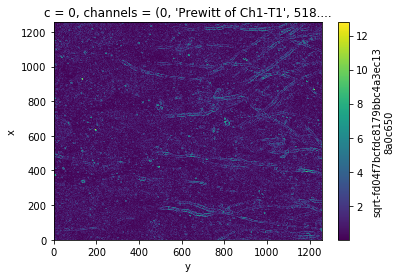

In [8]:
parsed.sel(c=0,t=0).plot.imshow()